# Iris Flower Classification with Scikit-Learn

![Iris](https://github.com/featurestoreorg/serverless-ml-course/raw/main/src/01-module/assets/iris.png)


In this notebook we will, 

1. Load the Iris Flower dataset into Pandas from a CSV file
2. Split training data into train and test sets (one train/test set each for both the features and labels)
3. Train a KNN Model using SkLearn
4. Evaluate model performance on the test set
5. Visually query the model "predictive analytics"

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [2]:
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
130,7.4,2.8,6.1,1.9,Virginica
78,6.0,2.9,4.5,1.5,Versicolor
113,5.7,2.5,5.0,2.0,Virginica
70,5.9,3.2,4.8,1.8,Versicolor
34,4.9,3.1,1.5,0.2,Setosa
80,5.5,2.4,3.8,1.1,Versicolor
89,5.5,2.5,4.0,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor
45,4.8,3.0,1.4,0.3,Setosa
43,5.0,3.5,1.6,0.6,Setosa


We can see that our 3 different classes of iris flowers have different *petal_lengths* 
(although there are some overlapping regions between Versicolor and the two other varieties (Setoas, Virginica))

<Axes: xlabel='variety', ylabel='sepal_length'>

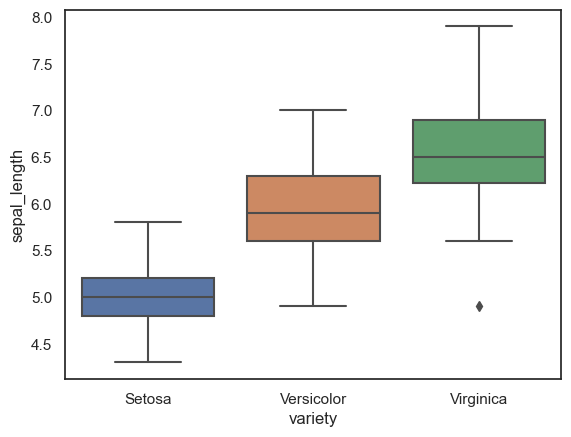

In [3]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_length', data=iris_df)

<Axes: xlabel='variety', ylabel='sepal_width'>

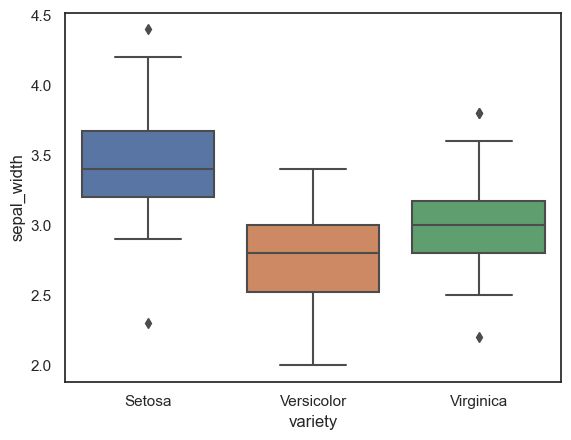

In [4]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_width', data=iris_df)

<AxesSubplot:xlabel='variety', ylabel='petal_length'>

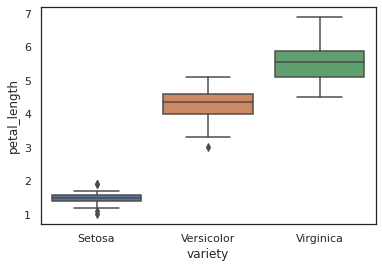

In [5]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_length', data=iris_df)

<Axes: xlabel='variety', ylabel='petal_width'>

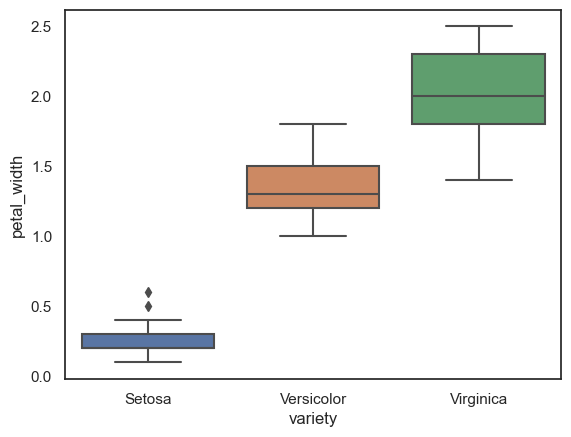

In [5]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_width', data=iris_df)

We need to split our DataFrame into two Dataframes. 

* The **features** DataFrame will contain the inputs for training/inference. 
* The **labels** DataFrame will contain the target we are trying to predict.

Note, that the ordering of the rows is preserved between the features and labels. For example, 'row 40' in the **features** DataFrame contains the correct features for 'row 40' in the **labels** DataFrame. That is, the row index acts like a common "join key" between the two DataFrames.

Split the DataFrame into 2: one DataFrame containing the *features* and one containing the *labels*.

In [7]:
features = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
labels = iris_df[["variety"]]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
labels

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


We can split our features and labels into a **train_set** and a **test_set**. You split your data into a train_set and a test_set, because you want to train your model on only the train_set, and then evaluate its performance on data that was not seen during training, the test_set. This technique helps evaluate the ability of your model to accurately predict on data it has not seen before.

This looks as follows:

* **X_** is a vector of features, so **X_train** is a vector of features from the **train_set**. 
* **y_** is a scale of labels, so **y_train** is a scalar of labels from the **train_set**. 

Note: a vector is an array of values and a scalar is a single value.

Note: that mathematical convention is that a vector is denoted by an uppercase letter (hence "X") and a scalar is denoted by a lowercase letter (hence "y").

**X_test** is the features and **y_test** is the labels from our holdout **test_set**. The **test_set** is used to evaluate model performance after the model has been trained.


In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)
y_train

,variety
9,Setosa
51,Versicolor
45,Setosa
58,Versicolor
125,Virginica
...,...
61,Versicolor
17,Setosa
7,Setosa
111,Virginica


We can see that our original lables (**y_train** and **y_test**) are categorical variables. 

We could transform the label from a categorical variable (a string) into a numerical variable (an int). Many machine learning training algorithms only take numerical values as inputs for training (and inference).
However, our ML algorithm, KNeighborsClassifier, works with categorical variables as labels.

A useful exercise here is to use Scikit-Learn's LabelEncoder to transform the labels to a numerical representation.

Now, we can fit a model to our features and labels from our training set (**X_train** and **y_train**). Fitting a model to a dataset is more commonly called "training a model".

In [10]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=2)

Now, we have trained our model. We can evaluate our model on the **test_set** to estimate its performance.

Scikit-Learn's KNeighborsClassifier take a DataFrame as input and returns a list of predictions.

Notice that for each input feature vector (containing our 4 features: sepal_length, sepal_width, petal_length, petal_width), the model returns a prediction of the type of flower.

In [12]:
y_pred = model.predict(X_test)
y_pred

array(['Versicolor', 'Virginica', 'Virginica', 'Virginica', 'Versicolor',
       'Virginica', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Setosa', 'Virginica', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Setosa'],
      dtype=object)

We can report on how accurate these predictions (**y_pred**) are compared to the labels (the actual results - **y_test**).

In [13]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test, y_pred, output_dict=True)
print(metrics)

{'Setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10}, 'Versicolor': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526316, 'support': 10}, 'Virginica': {'precision': 0.9090909090909091, 'recall': 1.0, 'f1-score': 0.9523809523809523, 'support': 10}, 'accuracy': 0.9666666666666667, 'macro avg': {'precision': 0.9696969696969697, 'recall': 0.9666666666666667, 'f1-score': 0.9665831244778613, 'support': 30}, 'weighted avg': {'precision': 0.9696969696969696, 'recall': 0.9666666666666667, 'f1-score': 0.9665831244778613, 'support': 30}}


In [14]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test, y_pred)
print(results)

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


Notice in the confusion matrix results that we have 1 or 2 incorrect predictions.
We have only 30 flowers in our test set - **y_test**.
Our model predicted 1 or 2 flowers were of type "Virginica", but the flowers were, in fact, "Versicolor".

<Axes: >

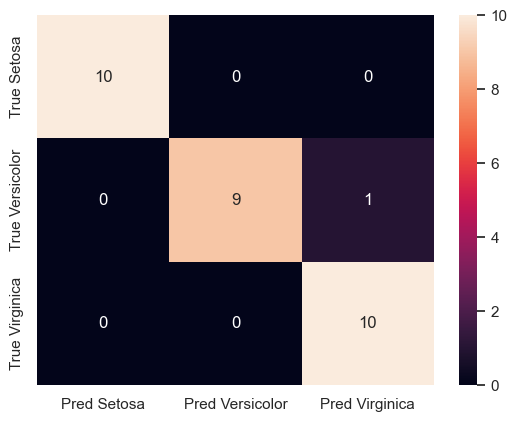

In [15]:
from matplotlib import pyplot

df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

sns.heatmap(df_cm, annot=True)

In [16]:
!pip install gradio --quiet
!pip install typing-extensions==4.3.0

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


In [17]:
import gradio as gr
import numpy as np
from PIL import Image
import requests


def iris(sepal_length, sepal_width, petal_length, petal_width):
    input_list = []
    input_list.append(sepal_length)
    input_list.append(sepal_width)
    input_list.append(petal_length)
    input_list.append(petal_width)
    # 'res' is a list of predictions returned as the label.
    res = model.predict(np.asarray(input_list).reshape(1, -1)) 
    # We add '[0]' to the result of the transformed 'res', because 'res' is a list, and we only want 
    # the first element.
#     flower_url = "https://repo.hops.works/master/hopsworks-tutorials/data/" + res[0] + ".png"
    flower_url = "https://raw.githubusercontent.com/featurestoreorg/serverless-ml-course/main/src/01-module/assets/" + res[0] + ".png"
    img = Image.open(requests.get(flower_url, stream=True).raw)            
    return img
        
demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=1.0, label="sepal length (cm)"),
        gr.inputs.Number(default=1.0, label="sepal width (cm)"),
        gr.inputs.Number(default=1.0, label="petal length (cm)"),
        gr.inputs.Number(default=1.0, label="petal width (cm)"),
        ],
    outputs=gr.Image(type="pil"))

demo.launch(share=True)

C:\Users\ACER\miniconda3\lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\gradio\inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://673e6b3fa370fe8c87.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
